# Time Series Anlsysis for settlement

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
ts = pd.read_csv('Settlement Plot for RB-105-SM1-1R.csv')

In [65]:
ts.Date = pd.to_datetime(ts.Date)
ts.index = ts.Date
#ts.drop('Date',axis=1,inplace=True)

# Let resample the data by week

In [66]:
ts_week = ts.resample('1w').mean().interpolate()

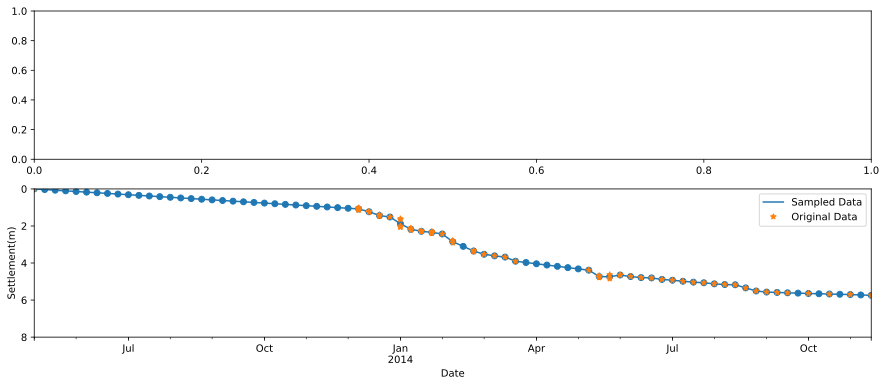

In [70]:
fig, ax = plt.subplots(2,1,figsize=(15,6))
ts_week.plot(ax=ax[1],y='Settlement',marker='o',label='Sampled Data')
ts.plot(y='Settlement',kind='line',ax=ax[1],marker='*',linewidth=0,label = 'Original Data')
ax[1].set_ylim([8,0])
ts.Date.max()
ax[1].set_ylabel('Settlement(m)')

In [ ]:
ts_week

In [8]:
ts_week

,Ground Level,Settlement
Date,,
2013-12-01,2.103500,0.504975
2013-12-08,2.251000,0.568938
2013-12-15,2.893000,0.789250
2013-12-22,3.107000,0.867500
2013-12-29,3.107000,1.269000
2014-01-05,3.107000,1.410000
2014-01-12,2.722500,1.512000
2014-01-19,2.780750,1.594000
2014-01-26,3.107800,1.709400


In [9]:
ts

,Date,Ground Level,Settlement
Date,,,
2013-11-27,2013-11-27,1.731,0.528000
2013-11-28,2013-11-28,2.181,0.524900
2013-11-29,2013-11-29,2.251,0.479000
2013-11-30,2013-11-30,2.251,0.488000
2013-12-04,2013-12-04,2.251,0.505781
2013-12-05,2013-12-05,2.251,0.513972
2013-12-06,2013-12-06,2.251,0.623000
2013-12-07,2013-12-07,2.251,0.633000
2013-12-09,2013-12-09,2.251,0.721000
